In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 
import missingno as msno # 缺失值可视化处理（无效矩阵数据密集显示、条形图、热图相关性、树状图）
import warnings
warnings.filterwarnings("ignore")

### 一、载入数据

In [2]:
train_data = pd.read_csv("./data/used_car_train_20200313.csv", sep=" ")
test_data = pd.read_csv("./data/used_car_testA_20200313.csv", sep=" ")

#### 所有特征集均脱敏处理
* name - 汽车编码
* regDate - 汽车注册时间
* model - 车型编码
* brand - 品牌
* bodyType - 车身类型
* fuelType - 燃油类型
* gearbox - 变速箱
* power - 汽车功率
* kilometer - 汽车行驶公里
* notRepairedDamage - 汽车有尚未修复的损坏
* regionCode - 看车地区编码
* seller - 销售方
* offerType - 报价类型
* creatDate - 广告发布时间
* price - 汽车价格
* v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13','v_14' 【匿名特征，包含v0-14在内15个匿名特征】

### 1.1 载入数据并简略查看数据

In [3]:
# 简略观察数据(head()+shape)
train_data.head().append(train_data.tail())

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
149995,149995,163978,20000607,121.0,10,4.0,0.0,1.0,163,15.0,...,0.280264,0.000310,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592
149996,149996,184535,20091102,116.0,11,0.0,0.0,0.0,125,10.0,...,0.253217,0.000777,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160
149997,149997,147587,20101003,60.0,11,1.0,1.0,0.0,90,6.0,...,0.233353,0.000705,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931
149998,149998,45907,20060312,34.0,10,3.0,1.0,0.0,156,15.0,...,0.256369,0.000252,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014
149999,149999,177672,19990204,19.0,28,6.0,0.0,1.0,193,12.5,...,0.284475,0.000000,0.040072,0.062543,0.025819,1.978453,-3.179913,0.031724,-1.483350,-0.342674


In [4]:
train_data.shape

(150000, 31)

### 1.2 总览数据概况

In [5]:
train_data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,...,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,43301.414527,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,...,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,...,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,...,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
SaleID               150000 non-null int64
name                 150000 non-null int64
regDate              150000 non-null int64
model                149999 non-null float64
brand                150000 non-null int64
bodyType             145494 non-null float64
fuelType             141320 non-null float64
gearbox              144019 non-null float64
power                150000 non-null int64
kilometer            150000 non-null float64
notRepairedDamage    150000 non-null object
regionCode           150000 non-null int64
seller               150000 non-null int64
offerType            150000 non-null int64
creatDate            150000 non-null int64
price                150000 non-null int64
v_0                  150000 non-null float64
v_1                  150000 non-null float64
v_2                  150000 non-null float64
v_3                  150000 non-null float64
v_4       

In [7]:
test_data.head().append(test_data.tail())

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,150000,66932,20111212,222.0,4,5.0,1.0,1.0,313,15.0,...,0.264405,0.121800,0.070899,0.106558,0.078867,-7.050969,-0.854626,4.800151,0.620011,-3.664654
1,150001,174960,19990211,19.0,21,0.0,0.0,0.0,75,12.5,...,0.261745,0.000000,0.096733,0.013705,0.052383,3.679418,-0.729039,-3.796107,-1.541230,-0.757055
2,150002,5356,20090304,82.0,21,0.0,0.0,0.0,109,7.0,...,0.260216,0.112081,0.078082,0.062078,0.050540,-4.926690,1.001106,0.826562,0.138226,0.754033
3,150003,50688,20100405,0.0,0,0.0,0.0,1.0,160,7.0,...,0.260466,0.106727,0.081146,0.075971,0.048268,-4.864637,0.505493,1.870379,0.366038,1.312775
4,150004,161428,19970703,26.0,14,2.0,0.0,0.0,75,15.0,...,0.250999,0.000000,0.077806,0.028600,0.081709,3.616475,-0.673236,-3.197685,-0.025678,-0.101290
49995,199995,20903,19960503,4.0,4,4.0,0.0,0.0,116,15.0,...,0.284664,0.130044,0.049833,0.028807,0.004616,-5.978511,1.303174,-1.207191,-1.981240,-0.357695
49996,199996,708,19991011,0.0,0,0.0,0.0,0.0,75,15.0,...,0.268101,0.108095,0.066039,0.025468,0.025971,-3.913825,1.759524,-2.075658,-1.154847,0.169073
49997,199997,6693,20040412,49.0,1,0.0,1.0,1.0,224,15.0,...,0.269432,0.105724,0.117652,0.057479,0.015669,-4.639065,0.654713,1.137756,-1.390531,0.254420
49998,199998,96900,20020008,27.0,1,0.0,0.0,1.0,334,15.0,...,0.261152,0.000490,0.137366,0.086216,0.051383,1.833504,-2.828687,2.465630,-0.911682,-2.057353
49999,199999,193384,20041109,166.0,6,1.0,NaN,1.0,68,9.0,...,0.228730,0.000300,0.103534,0.080625,0.124264,2.914571,-1.135270,0.547628,2.094057,-1.552150


### 二. EDA 

### 2.1 查看数据行缺失、列缺失、唯一值比例

In [8]:
X_train = train_data.drop("price",1)
X_test = test_data.copy()

In [9]:
def get_row_col_null_ratio(data_X):
    row_null_rate = data_X.apply(lambda x: x.isnull().sum()/len(x), 1)
    col_null_rate = data_X.isnull().sum()/len(data_X)
    identical_rate = data_X.apply(lambda x: (x.value_counts()/x.size).iloc[0], 0)
    row_null_rate.sort_values(ascending=False, inplace=True)
    col_null_rate.sort_values(ascending=False, inplace=True)
    identical_rate.sort_values(ascending=False, inplace=True)
    return row_null_rate, col_null_rate, identical_rate


In [10]:
row_null_rate, col_null_rate, identical_rate = get_row_col_null_ratio(X_train)
row_null_rate_test, col_null_rate_test, identical_rate_test = get_row_col_null_ratio(X_test)

In [11]:
row_null_rate

82257     0.1
103717    0.1
26790     0.1
45228     0.1
62272     0.1
         ... 
97582     0.0
97583     0.0
97584     0.0
97585     0.0
0         0.0
Length: 150000, dtype: float64

####  数据缺失可视化

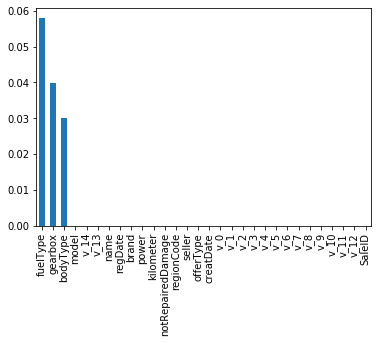

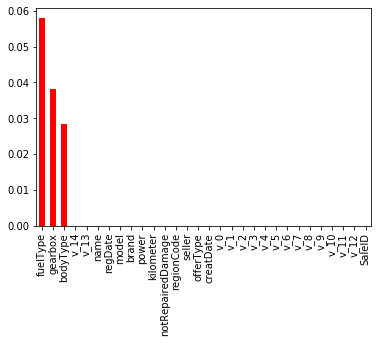

In [16]:
# 变量缺失比例查看
plt.figure(1)
col_null_rate.plot.bar()
plt.figure(2)
col_null_rate_test.plot.bar(color='red')

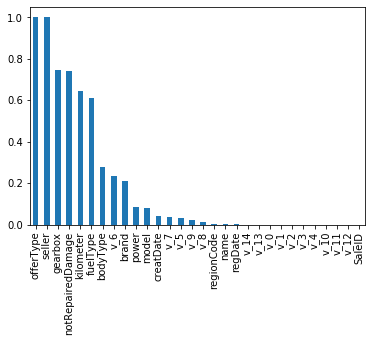

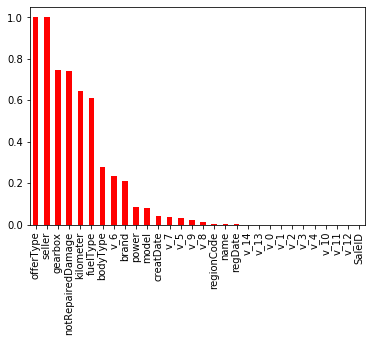

In [17]:
# 变量唯一值比例查看
plt.figure(1)
identical_rate.plot.bar()
plt.figure(2)
identical_rate.plot.bar(color='red', title)

offerType 和 seller唯一值比例过高，没有信息量，无效变量！

In [ ]:
# 删除无效变量
del_cols = ["offerType","seller"]
train_data = train_data.drop(del_cols, 1)
test_data = test_data.drop(del_cols, 1)

通过以上两句可以很直观的了解哪些列存在 “nan”, 并可以把nan的个数打印，主要的目的在于 nan存在的个数是否真的很大，
如果很小一般选择填充，如果使用lgb等树模型可以直接空缺，让树自己去优化，但如果nan存在的过多、可以考虑删掉

In [24]:
# 可视化看下缺省值
# msno.matrix(train_data.sample(250))
# msno.bar(train_data)
# msno.heatmap(train_data)
# msno.dendrogram(train_data)

### 2.2 查看异常值检测

In [26]:
train_data.info()
# notRepairedDamage 为object类型，其余为数值型

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 29 columns):
SaleID               150000 non-null int64
name                 150000 non-null int64
regDate              150000 non-null int64
model                149999 non-null float64
brand                150000 non-null int64
bodyType             145494 non-null float64
fuelType             141320 non-null float64
gearbox              144019 non-null float64
power                150000 non-null int64
kilometer            150000 non-null float64
notRepairedDamage    150000 non-null object
regionCode           150000 non-null int64
creatDate            150000 non-null int64
price                150000 non-null int64
v_0                  150000 non-null float64
v_1                  150000 non-null float64
v_2                  150000 non-null float64
v_3                  150000 non-null float64
v_4                  150000 non-null float64
v_5                  150000 non-null float64
v_6   

In [27]:
train_data["notRepairedDamage"].value_counts()

0.0    111361
-       24324
1.0     14315
Name: notRepairedDamage, dtype: int64

In [28]:
# 可以看出来‘ - ’也为空缺值，因为很多模型对nan有直接的处理，这里我们先不做处理，先替换成nan
train_data.replace("-", np.nan, inplace=True)

In [29]:
train_data["notRepairedDamage"].value_counts()

0.0    111361
1.0     14315
Name: notRepairedDamage, dtype: int64

In [31]:
train_data["notRepairedDamage"].value_counts()/len(train_data)

0.0    0.742407
1.0    0.095433
Name: notRepairedDamage, dtype: float64

In [106]:
test_data["notRepairedDamage"].value_counts()

0.0    37249
-       8031
1.0     4720
Name: notRepairedDamage, dtype: int64

In [107]:
test_data.replace("-",np.nan, inplace=True)

In [109]:
test_data["notRepairedDamage"].value_counts()/len(test_data)

0.0    0.74498
1.0    0.09440
Name: notRepairedDamage, dtype: float64

###  2.3 定性变量分析

In [36]:
# 定性变量、定量变量、时间类变量
# saleID 非特征
numeric_features = ['power', 'kilometer', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13','v_14' ]
categorical_features = ['name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage', 'regionCode']
date_features = ["regDate","creatDate"]


In [37]:
# 分离label即预测值
y_train = train_data['price']

In [30]:
# 这个区别方式适用于没有直接label coding的数据
# 这里不适用，需要人为根据实际含义来区分
# 数字特征
# numeric_features = Train_data.select_dtypes(include=[np.number])
# numeric_features.columns
# # 类型特征
# categorical_features = Train_data.select_dtypes(include=[np.object])
# categorical_features.columns

#### 1) 特征数据量查看

In [39]:

## train
print("训练集-定性变量分布")
df = train_data.copy()
for col in categorical_features:
    print(f"{col} 特征分布：")
    n = df[col].nunique()
    print(f"{col}特征有{n}个不同的值")
    print(df[col].value_counts().sort_values(ascending=False))
    print("\n")

训练集-定性变量分布
name 特征分布：
name特征有99662个不同的值
708       282
387       282
55        280
1541      263
203       233
         ... 
131018      1
118732      1
116685      1
122830      1
140244      1
Name: name, Length: 99662, dtype: int64


model 特征分布：
model特征有248个不同的值
0.0      11762
19.0      9573
4.0       8445
1.0       6038
29.0      5186
         ...  
209.0        2
240.0        2
242.0        2
245.0        2
247.0        1
Name: model, Length: 248, dtype: int64


brand 特征分布：
brand特征有40个不同的值
0     31480
4     16737
14    16089
10    14249
1     13794
6     10217
9      7306
5      4665
13     3817
11     2945
3      2461
7      2361
16     2223
8      2077
25     2064
27     2053
21     1547
15     1458
19     1388
20     1236
12     1109
22     1085
26      966
30      940
17      913
24      772
28      649
32      592
29      406
37      333
2       321
31      318
18      316
36      228
34      227
33      218
23      186
35      180
38       65
39        9
Name: brand, dtype: i

In [41]:
## 测试集
print("测试集非数值变量分布")
df = test_data.copy()
for col in categorical_features:
    print(f"{col} 特征分布：")
    n = df[col].nunique()
    print(f"{col}特征有{n}个不同的值")
    print(df[col].value_counts().sort_values(ascending=False))
    print("\n")

测试集非数值变量分布
name 特征分布：
name特征有37453个不同的值
55        97
708       96
387       95
1541      88
713       74
          ..
38957      1
106538     1
110632     1
116775     1
103672     1
Name: name, Length: 37453, dtype: int64


model 特征分布：
model特征有247个不同的值
0.0      3896
19.0     3245
4.0      3007
1.0      1981
29.0     1742
         ... 
240.0       1
244.0       1
243.0       1
242.0       1
246.0       1
Name: model, Length: 247, dtype: int64


brand 特征分布：
brand特征有40个不同的值
0     10348
4      5763
14     5314
10     4766
1      4532
6      3502
9      2423
5      1569
13     1245
11      919
7       795
3       773
16      771
8       704
25      695
27      650
21      544
15      511
20      450
19      450
12      389
22      363
30      324
17      317
26      303
24      268
28      225
32      193
29      117
31      115
18      106
2       104
37       92
34       77
33       76
36       67
23       62
35       53
38       23
39        2
Name: brand, dtype: int64


bodyType 特征分布：


#### 2）类别特征分布查看-特征箱形图可视化

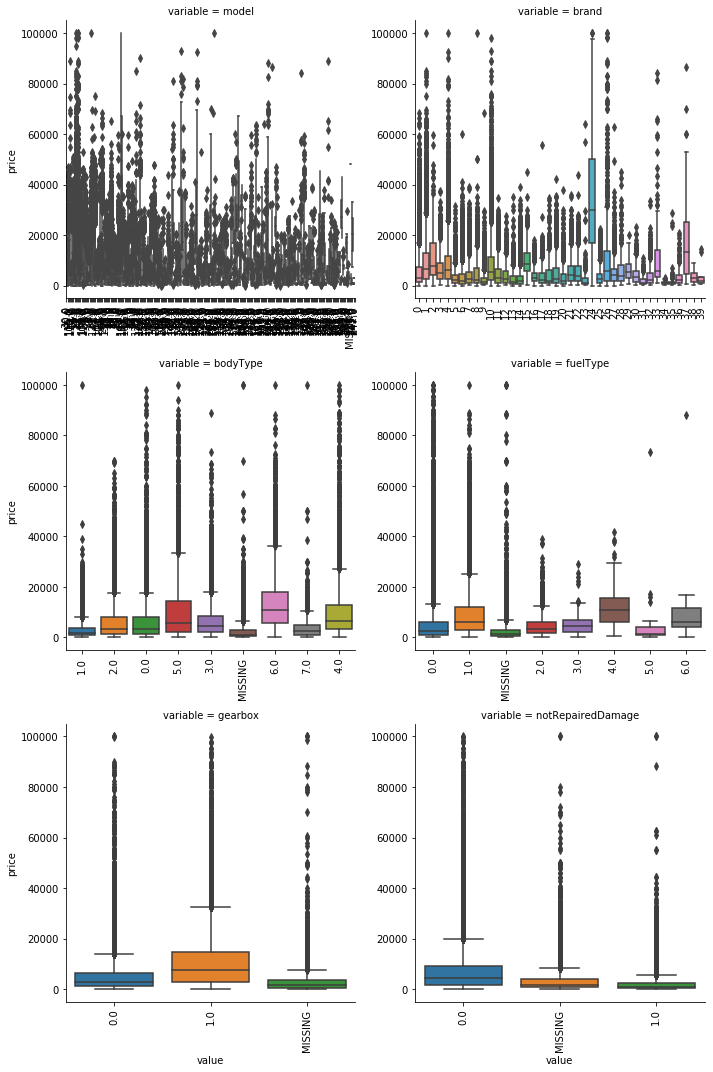

In [42]:
# 因为 name和 regionCode的类别太稀疏了，这里我们把不稀疏的几类画一下
categorical_features = ['model',
 'brand',
 'bodyType',
 'fuelType',
 'gearbox',
 'notRepairedDamage']
for c in categorical_features:
    train_data[c] = train_data[c].astype('category')
    if train_data[c].isnull().any():
        train_data[c] = train_data[c].cat.add_categories(['MISSING'])
        train_data[c] = train_data[c].fillna('MISSING')


def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)

f = pd.melt(train_data, id_vars=['price'], value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "price")


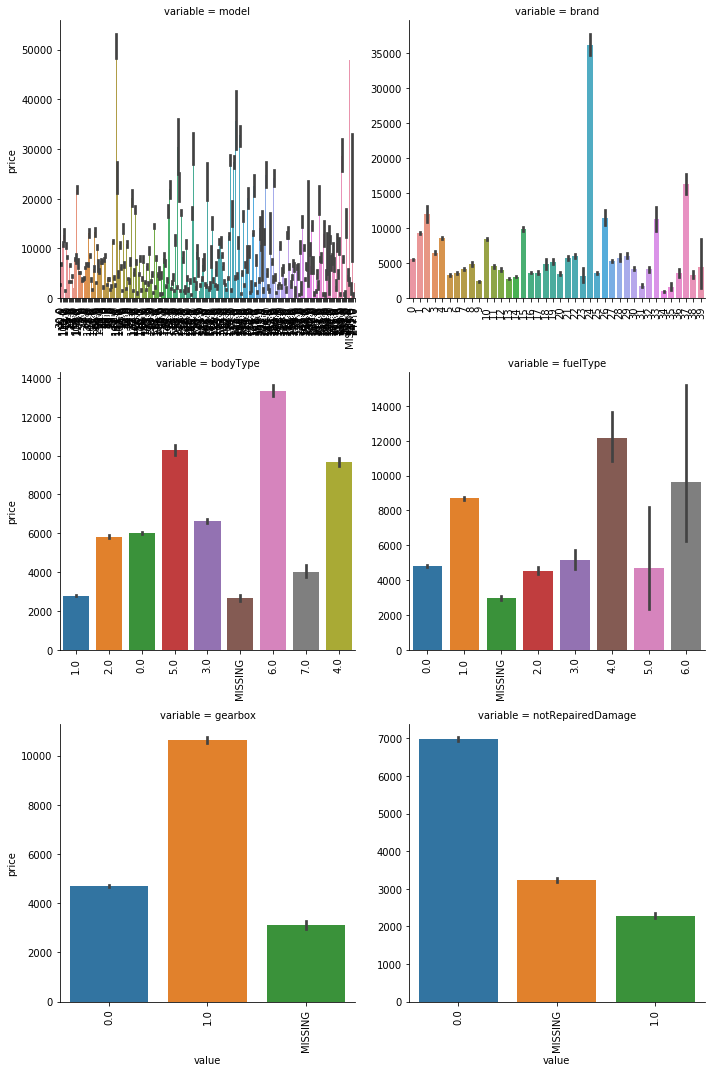

In [43]:
## 4) 类别特征的柱形图可视化
def bar_plot(x, y, **kwargs):
    sns.barplot(x=x, y=y)
    x=plt.xticks(rotation=90)

f = pd.melt(train_data, id_vars=['price'], value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(bar_plot, "value", "price")

### 2.4 定量变量分析

In [44]:
numeric_features.append('price')

In [45]:
numeric_features

['power',
 'kilometer',
 'v_0',
 'v_1',
 'v_2',
 'v_3',
 'v_4',
 'v_5',
 'v_6',
 'v_7',
 'v_8',
 'v_9',
 'v_10',
 'v_11',
 'v_12',
 'v_13',
 'v_14',
 'price']

### 1)相关性分析

In [47]:
price_numeric = train_data[numeric_features]
correlation = price_numeric.corr()
correlation["price"].sort_values(ascending=False) # 和目标变量相关性

price        1.000000
v_12         0.692823
v_8          0.685798
v_0          0.628397
power        0.219834
v_5          0.164317
v_2          0.085322
v_6          0.068970
v_1          0.060914
v_14         0.035911
v_13        -0.013993
v_7         -0.053024
v_4         -0.147085
v_9         -0.206205
v_10        -0.246175
v_11        -0.275320
kilometer   -0.440519
v_3         -0.730946
Name: price, dtype: float64

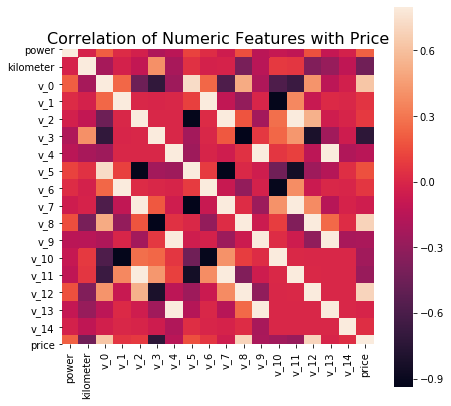

In [48]:
f , ax = plt.subplots(figsize = (7, 7))
plt.title('Correlation of Numeric Features with Price',y=1,size=16)
sns.heatmap(correlation,square = True,  vmax=0.8)

In [49]:
del price_numeric['price']

#### 2) 查看几个特征的偏度和峰值

In [50]:
for col in numeric_features:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(train_data[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(train_data[col].kurt())  
         )

power           Skewness: 65.86     Kurtosis: 5733.45
kilometer       Skewness: -1.53     Kurtosis: 001.14
v_0             Skewness: -1.32     Kurtosis: 003.99
v_1             Skewness: 00.36     Kurtosis: -01.75
v_2             Skewness: 04.84     Kurtosis: 023.86
v_3             Skewness: 00.11     Kurtosis: -00.42
v_4             Skewness: 00.37     Kurtosis: -00.20
v_5             Skewness: -4.74     Kurtosis: 022.93
v_6             Skewness: 00.37     Kurtosis: -01.74
v_7             Skewness: 05.13     Kurtosis: 025.85
v_8             Skewness: 00.20     Kurtosis: -00.64
v_9             Skewness: 00.42     Kurtosis: -00.32
v_10            Skewness: 00.03     Kurtosis: -00.58
v_11            Skewness: 03.03     Kurtosis: 012.57
v_12            Skewness: 00.37     Kurtosis: 000.27
v_13            Skewness: 00.27     Kurtosis: -00.44
v_14            Skewness: -1.19     Kurtosis: 002.39
price           Skewness: 03.35     Kurtosis: 019.00


#### 3) 每个数值特征得分布可视化

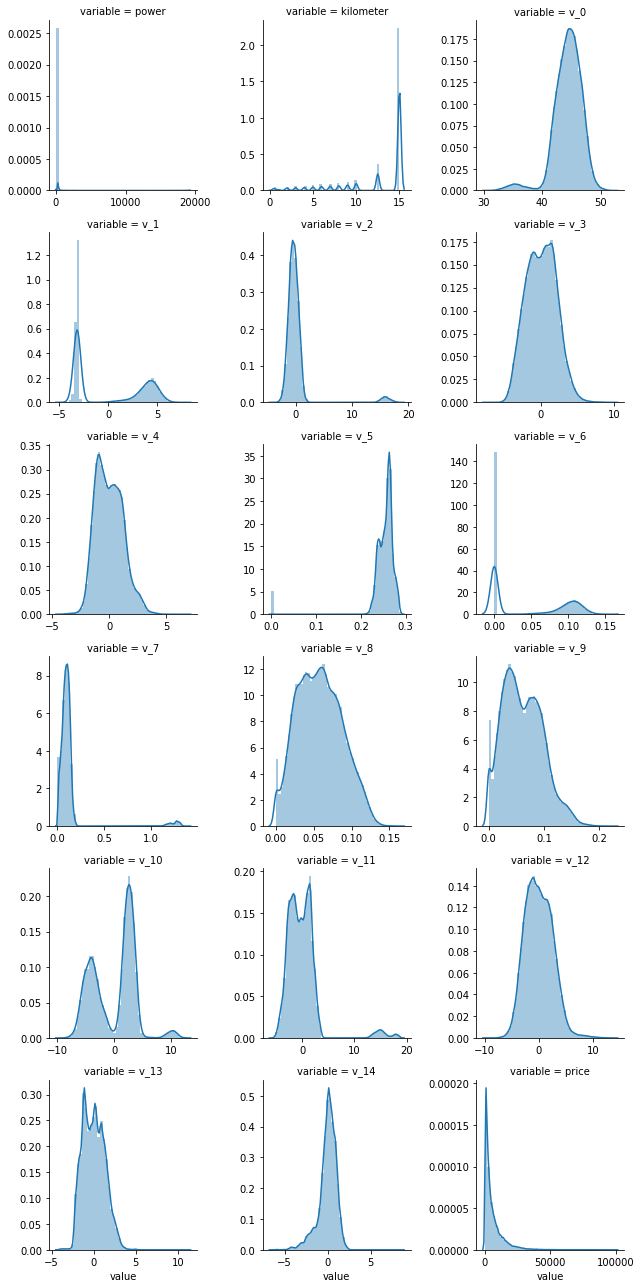

In [51]:
f = pd.melt(train_data, value_vars=numeric_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

可以看出匿名特征分布较均匀

#### 4) 数字特征相互之间的关系可视化

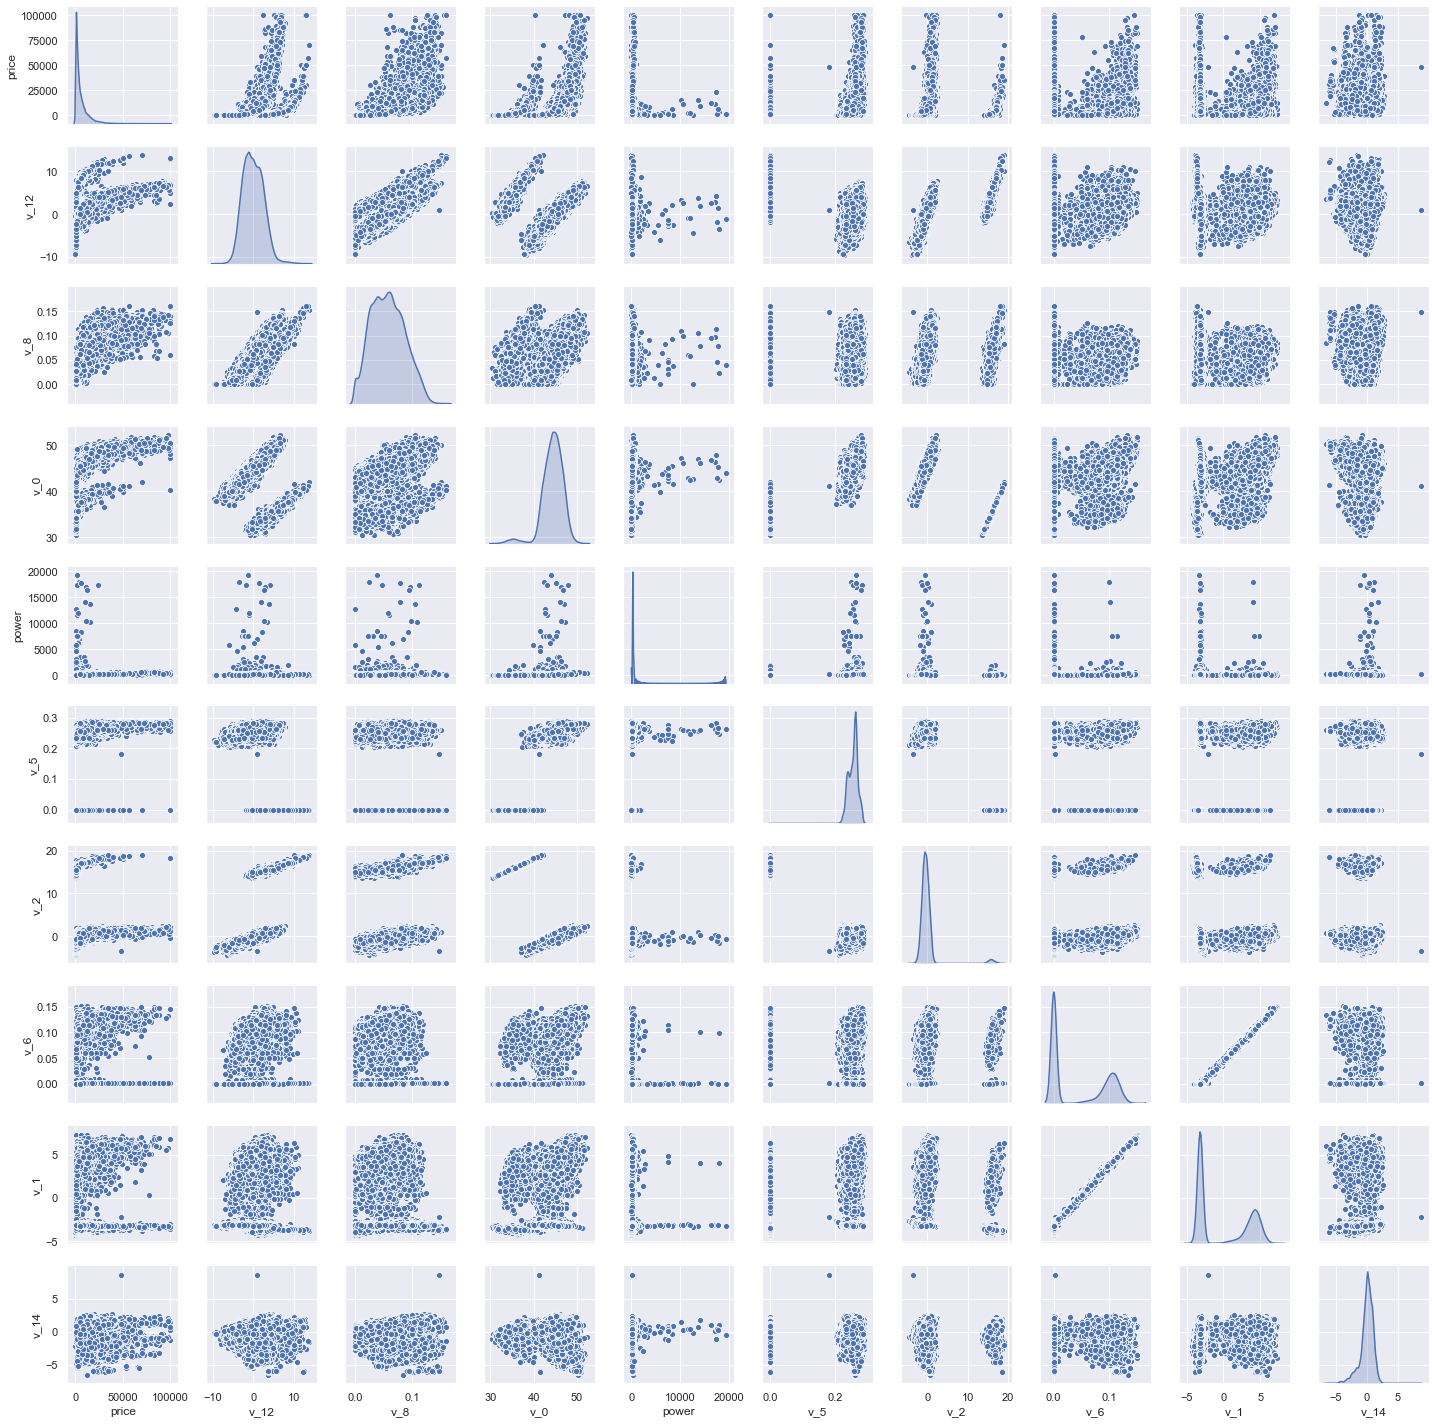

In [52]:
sns.set()
columns = ['price', 'v_12', 'v_8' , 'v_0', 'power', 'v_5',  'v_2', 'v_6', 'v_1', 'v_14']
sns.pairplot(train_data[columns],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

#### 5) 多变量互相回归关系可视化

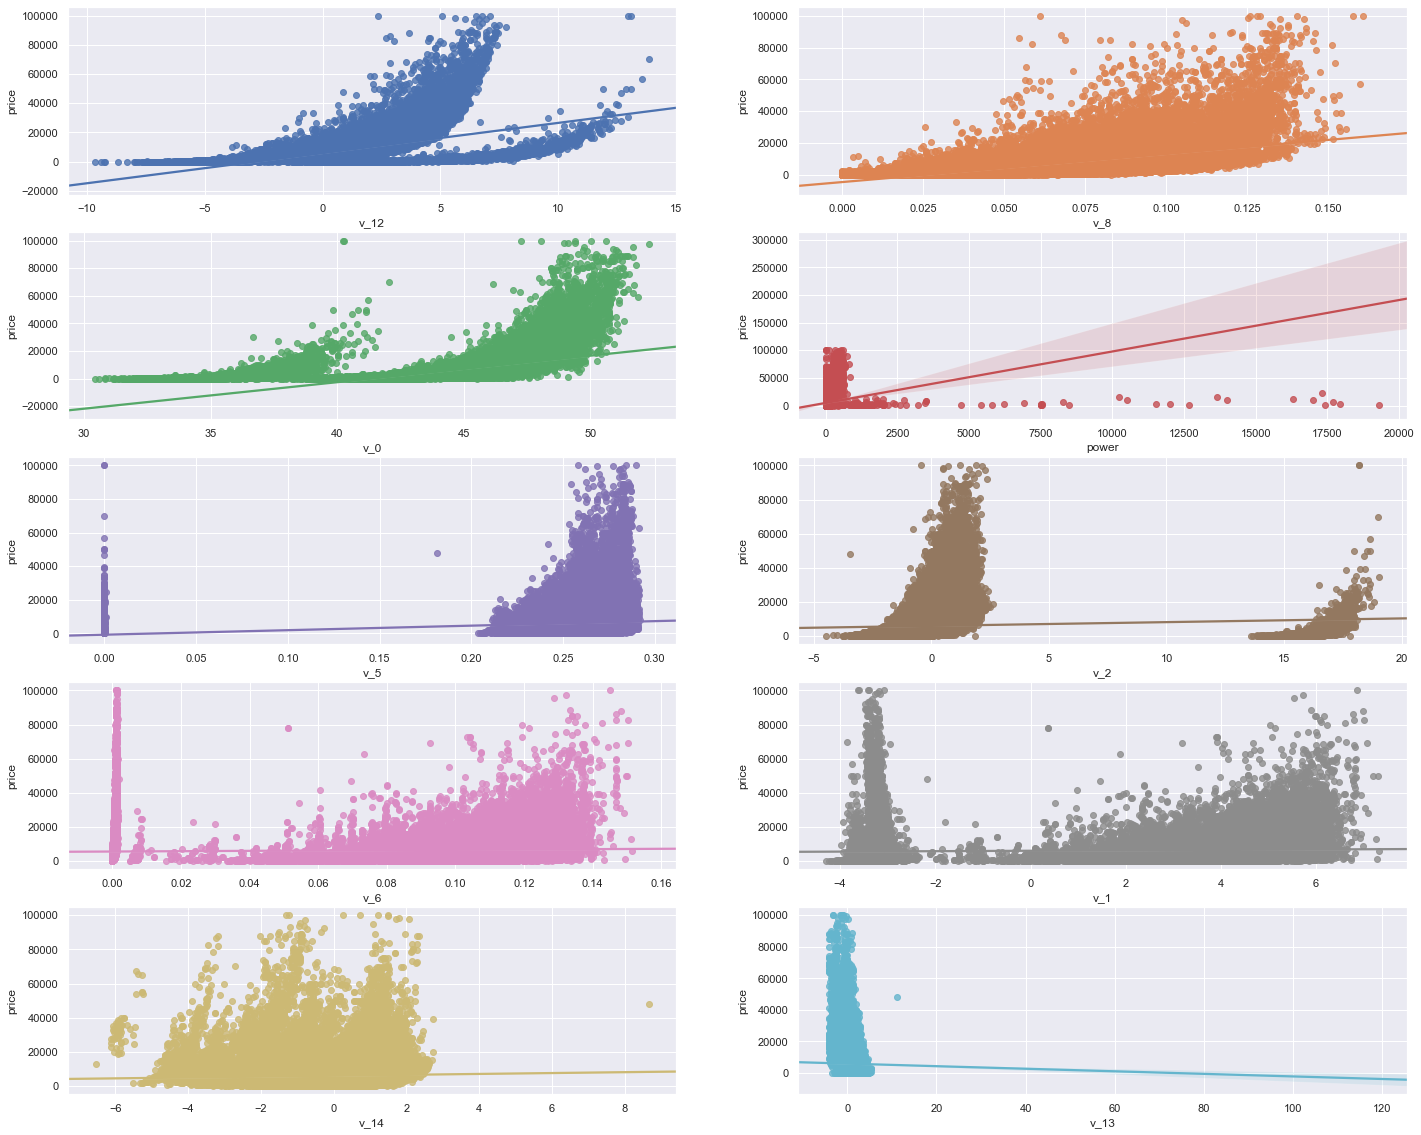

In [53]:
Y_train = train_data["price"]
Train_data = train_data.copy()
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(nrows=5, ncols=2, figsize=(24, 20))
# ['v_12', 'v_8' , 'v_0', 'power', 'v_5',  'v_2', 'v_6', 'v_1', 'v_14']
v_12_scatter_plot = pd.concat([Y_train,Train_data['v_12']],axis = 1)
sns.regplot(x='v_12',y = 'price', data = v_12_scatter_plot,scatter= True, fit_reg=True, ax=ax1)

v_8_scatter_plot = pd.concat([Y_train,Train_data['v_8']],axis = 1)
sns.regplot(x='v_8',y = 'price',data = v_8_scatter_plot,scatter= True, fit_reg=True, ax=ax2)

v_0_scatter_plot = pd.concat([Y_train,Train_data['v_0']],axis = 1)
sns.regplot(x='v_0',y = 'price',data = v_0_scatter_plot,scatter= True, fit_reg=True, ax=ax3)

power_scatter_plot = pd.concat([Y_train,Train_data['power']],axis = 1)
sns.regplot(x='power',y = 'price',data = power_scatter_plot,scatter= True, fit_reg=True, ax=ax4)

v_5_scatter_plot = pd.concat([Y_train,Train_data['v_5']],axis = 1)
sns.regplot(x='v_5',y = 'price',data = v_5_scatter_plot,scatter= True, fit_reg=True, ax=ax5)

v_2_scatter_plot = pd.concat([Y_train,Train_data['v_2']],axis = 1)
sns.regplot(x='v_2',y = 'price',data = v_2_scatter_plot,scatter= True, fit_reg=True, ax=ax6)

v_6_scatter_plot = pd.concat([Y_train,Train_data['v_6']],axis = 1)
sns.regplot(x='v_6',y = 'price',data = v_6_scatter_plot,scatter= True, fit_reg=True, ax=ax7)

v_1_scatter_plot = pd.concat([Y_train,Train_data['v_1']],axis = 1)
sns.regplot(x='v_1',y = 'price',data = v_1_scatter_plot,scatter= True, fit_reg=True, ax=ax8)

v_14_scatter_plot = pd.concat([Y_train,Train_data['v_14']],axis = 1)
sns.regplot(x='v_14',y = 'price',data = v_14_scatter_plot,scatter= True, fit_reg=True, ax=ax9)

v_13_scatter_plot = pd.concat([Y_train,Train_data['v_13']],axis = 1)
sns.regplot(x='v_13',y = 'price',data = v_13_scatter_plot,scatter= True, fit_reg=True, ax=ax10)


###  2.5 了解预测值分布

In [54]:
train_data["price"]

0         1850
1         3600
2         6222
3         2400
4         5200
          ... 
149995    5900
149996    9500
149997    7500
149998    4999
149999    4700
Name: price, Length: 150000, dtype: int64

In [55]:
train_data.price.value_counts()/len(train_data)

500      0.015580
1500     0.014387
1200     0.012813
1000     0.012333
2500     0.012140
           ...   
25321    0.000007
8886     0.000007
8801     0.000007
37920    0.000007
8188     0.000007
Name: price, Length: 3763, dtype: float64

#### 1)总体分布概况（无边界约翰分布图）

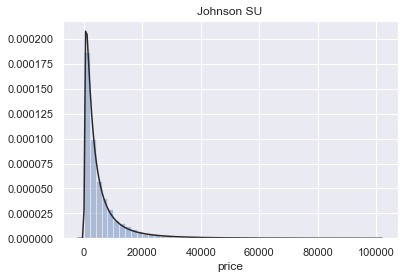

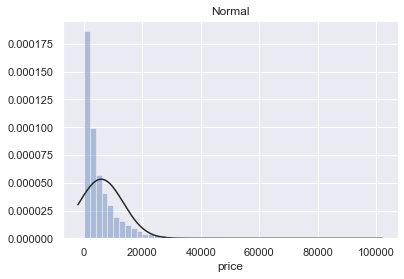

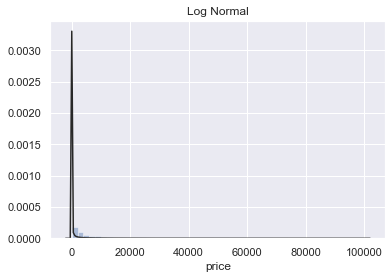

In [56]:
# 利用distplot() 把数据拟合成参数分布的图形并且观察它们之间的差距,再运用fit来进行参数控制。
import scipy.stats as st
y = train_data['price']

plt.figure(1)
plt.title("Johnson SU")
sns.distplot(y, kde=False, fit=st.johnsonsu)# 无界约翰逊分布

plt.figure(2)
plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)# 正态分布

plt.figure(3)
plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)# 对数分布

价格不服从正态分布，回归之前，进行数据变换，最佳变换是无界约翰逊分布

#### 2) 查看skewness and kurtosis

Skewness: 3.346487
Kurtosis: 18.995183


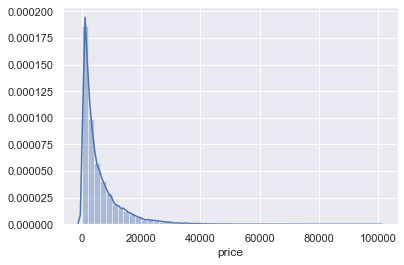

In [57]:
sns.distplot(train_data['price']);
print("Skewness: %f" % train_data['price'].skew())
print("Kurtosis: %f" % train_data['price'].kurt())

In [58]:
## 查看变量的偏度和峰度
dt_skew = pd.merge(train_data.skew().reset_index(drop=False), test_data.skew().reset_index(drop=False), on="index")
dt_skew.columns = ["column", 'train_skew', 'test_skew']
dt_skew

,column,train_skew,test_skew
0,SaleID,0.000000,0.000000
1,name,0.557606,0.552130
2,regDate,0.028495,0.023694
3,brand,1.150760,1.140710
4,power,65.863178,63.538280
5,kilometer,-1.525921,-1.521108
6,regionCode,0.688881,0.665406
7,creatDate,-79.013310,-98.870127
8,v_0,-1.316712,-1.258401
9,v_1,0.359454,0.358008


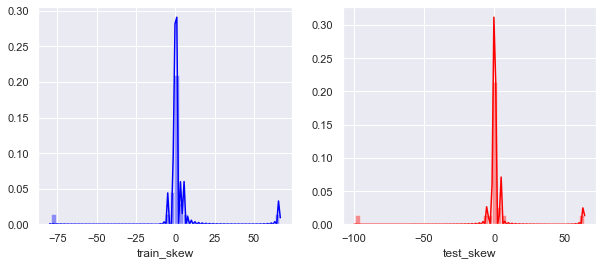

In [59]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(dt_skew['train_skew'],color='blue',axlabel ='train_skew')

plt.subplot(1,2,2)
sns.distplot(dt_skew['test_skew'],color='red',axlabel ='test_skew')

In [60]:
dt_kurt = pd.merge(train_data.kurt().reset_index(drop=False), test_data.kurt().reset_index(drop=False), on="index")
dt_kurt.columns = ["column", 'train_kurt', 'test_kurt']
dt_kurt

,column,train_kurt,test_kurt
0,SaleID,-1.200000,-1.200000
1,name,-1.039945,-1.040584
2,regDate,-0.697308,-0.687258
3,brand,1.076201,1.045196
4,power,5733.451054,5345.533033
5,kilometer,1.141934,1.132841
6,regionCode,-0.340832,-0.376269
7,creatDate,6881.080328,11707.136504
8,v_0,3.993841,3.871399
9,v_1,-1.753017,-1.751179


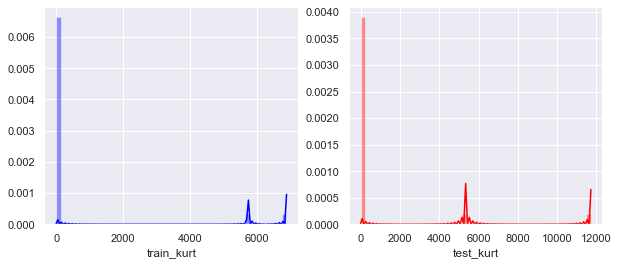

In [61]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(dt_kurt['train_kurt'],color='blue',axlabel ='train_kurt')

plt.subplot(1,2,2)
sns.distplot(dt_kurt['test_kurt'],color='red',axlabel ='test_kurt')

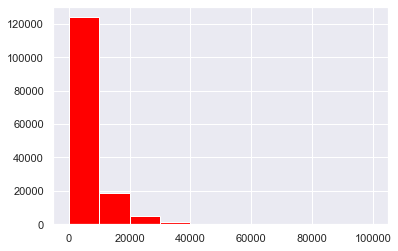

In [62]:
## 3) 查看预测值的具体频数
plt.hist(train_data['price'], orientation = 'vertical',histtype = 'bar', color ='red')
plt.show()

查看频数, 大于20000得值极少，其实这里也可以把这些当作特殊得值（异常值）直接用填充或者删掉，再前面进行

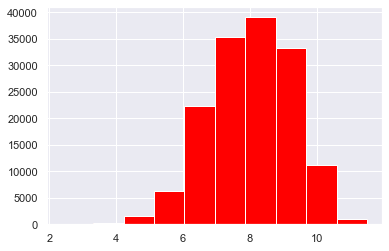

In [63]:
# log变换 z之后的分布较均匀，可以进行log变换进行预测，这也是预测问题常用的trick
plt.hist(np.log(train_data['price']), orientation = 'vertical',histtype = 'bar', color ='red') 
plt.show()

### 三、构造特征

In [64]:
# 训练集和测试集放到一起，方便构造特征
train_data["train"] = 1
test_data["train"] = 0
data = pd.concat([train_data, test_data], ignore_index=True, sort=False)

#### 1) 计算使用时间

In [67]:
# data['creatDate'] - data['regDate']，反应汽车使用时间，一般来说价格与使用时间成反比
# 不过要注意，数据里有时间出错的格式，所以我们需要 errors='coerce'
data['used_time'] = (pd.to_datetime(data["creatDate"], format='%Y%m%d', errors='coerce')
                     - pd.to_datetime(data['regDate'], format='%Y%m%d', errors='coerce')).dt.days

# 汽车使用时间异常值数量、比例为
error_cnt = data['used_time'].isnull().sum()
print("汽车使用时间异常值数量:%d个, 异常值比例：%.2f%%" % (error_cnt, error_cnt/len(data)*100))
train_error_cnt = data[data.train == 1]['used_time'].isnull().sum()
test_error_cnt = data[data.train == 0]['used_time'].isnull().sum()
print("train-汽车使用时间异常值数量:%d个, 异常值比例：%.2f%%" % (train_error_cnt, train_error_cnt/len(train_data)*100))
print("test-汽车使用时间异常值数量:%d个, 异常值比例：%.2f%%" % (test_error_cnt, test_error_cnt/len(test_data)*100))

汽车使用时间异常值数量:15101个, 异常值比例：7.55%
train-汽车使用时间异常值数量:11347个, 异常值比例：7.56%
test-汽车使用时间异常值数量:3754个, 异常值比例：7.51%


#### 2) 提取城市信息

In [70]:
# 从邮编中提取城市信息，因为是德国的数据，所以参考德国的邮编，相当于加入了先验知识
data['city'] = data['regionCode'].apply(lambda x: str(x)[:-3])

In [73]:
data['city'].unique()

array(['1', '4', '2', '', '6', '3', '5', '7', '8'], dtype=object)

In [74]:
data['city'] = data['city'].replace('', np.nan)

In [78]:
data["city"].isnull().sum()/len(data)

0.244375

#### 3) 构造统计量特征:报告计数、求和、比例、标准差等

In [81]:
# 计算某品牌的销售统计量
# 这里要以 train 的数据计算统计量
train_gb = train_data.groupby("brand")
all_info = {}
for kind, kind_data in train_gb:
    info = {}
    kind_data = kind_data[kind_data['price'] > 0]
    info['brand_amount'] = len(kind_data)  # 品牌销量
    info['brand_price_max'] = kind_data.price.max()  # 品牌价格最大、最小、众数、销售总价（这里可以考虑季度、月份、等销售情况等--之后加入（待做）
    info['brand_price_median'] = kind_data.price.median()
    info['brand_price_min'] = kind_data.price.min()
    info['brand_price_sum'] = kind_data.price.sum()
    info['brand_price_std'] = kind_data.price.std() # 价格标准差
    info['brand_price_average'] = round(kind_data.price.sum() / (len(kind_data) + 1), 2)  # 平均价格
    all_info[kind] = info
brand_fe = pd.DataFrame(all_info).T.reset_index().rename(columns={"index": "brand"})
data = data.merge(brand_fe, how='left', on='brand') # 测试集未被覆盖到的品牌数据为空

In [82]:
data.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6',
       'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14', 'train',
       'used_time', 'city', 'brand_amount', 'brand_price_max',
       'brand_price_median', 'brand_price_min', 'brand_price_sum',
       'brand_price_std', 'brand_price_average'],
      dtype='object')

In [83]:
# 删除creatDate, regDate、brand、regionCode这几个变量
del_cols = ['creatDate', 'regDate','brand','regionCode']
data = data.drop(del_cols, 1)

In [88]:
train_data2 = data[data.train==1]
test_data2 = data[data.train==0]
train_data2 = train_data2.drop("train", 1)
test_data2 = test_data2.drop("train", 1)

In [86]:
### 对长尾分布变量进行变换

In [89]:
train_data2.to_csv("./data/train_data_1.csv", sep=",", index=False)
test_data2.to_csv("./data/test_data_1.csv", sep=",", index=False)

### 四、模型建立

**reduce_mem_usage 函数通过调整数据类型，帮助我们减少数据在内存中占用的空间,缓解pandas中DataFrame占用内存过大的问题**， 原来还可以这么操作！跟大佬学到了~

数据类型 | 范围下限（含） | 范围上限（含）  
-|-|-
unit8 | 0 | 255
unit16| 0| 65535
int8  | -128| 127
int16 | -32768| 32767
int32 | -2147483648|2147483647
int64 |–9,223,372,036,854,775,808|9,223,372,036,854,775,807

In [30]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() 
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max: #  np.iinfo(np.int8).min数据类型下限
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')
            
    end_mem = df.memory_usage().sum() 
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

In [31]:
## object类型和category类型区分

In [32]:
train = pd.read_csv("./data/train_data_1.csv", sep=",")

In [33]:
train.columns

Index(['SaleID', 'name', 'model', 'bodyType', 'fuelType', 'gearbox', 'power',
       'kilometer', 'notRepairedDamage', 'price', 'v_0', 'v_1', 'v_2', 'v_3',
       'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
       'v_13', 'v_14', 'used_time', 'city', 'brand_amount', 'brand_price_max',
       'brand_price_median', 'brand_price_min', 'brand_price_sum',
       'brand_price_std', 'brand_price_average'],
      dtype='object')

In [34]:
sample_feature = reduce_mem_usage(train)

Memory usage of dataframe is 40800128.00 MB
Memory usage after optimization is: 11125488.00 MB
Decreased by 72.7%


In [47]:
sample_feature = sample_feature.drop("SaleID", 1)
categorical_features = ['name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage', 'city']
continuous_feature_names = [x for x in sample_feature.columns if x not in categorical_features+["price"]]

In [48]:
train = sample_feature[continuous_feature_names + ['price']]

train_X = train[continuous_feature_names]
train_y = train['price']

In [49]:
train_X = train_X.fillna(0) # 缺失值填充

### 4.1 对数值型变量进行简单回归建模

In [50]:
train_X.columns

Index(['power', 'kilometer', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6',
       'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14',
       'used_time', 'brand_amount', 'brand_price_max', 'brand_price_median',
       'brand_price_min', 'brand_price_sum', 'brand_price_std',
       'brand_price_average'],
      dtype='object')

In [51]:
# 简单线性回归分析
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(normalize=True)
linear_model = linear_model.fit(train_X, train_y)

In [52]:
print(f"intercept:{linear_model.intercept_}")  # 截距
pd.DataFrame({"variable": train_X.columns, "coef":linear_model.coef_}).sort_values(by="coef", ascending=False) # 变量权重


intercept:-949552.125


,variable,coef
8,v_6,3.583308e+06
7,v_5,2.764349e+06
10,v_8,1.285047e+06
11,v_9,8.258003e+05
9,v_7,5.340249e+05
12,v_10,2.616083e+04
6,v_4,1.013532e+04
13,v_11,8.555783e+03
16,v_14,1.703461e+03
0,power,2.121594e+00


In [53]:
# 查看真实结果和预测结果的频数
linear_predict = linear_model.predict(train_X)

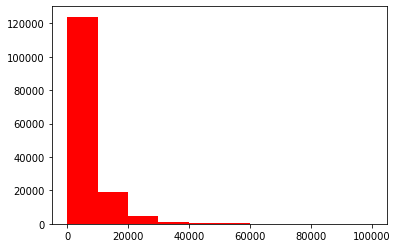

In [54]:
plt.hist(train_y, orientation = 'vertical',histtype = 'bar', color ='red')
plt.show()

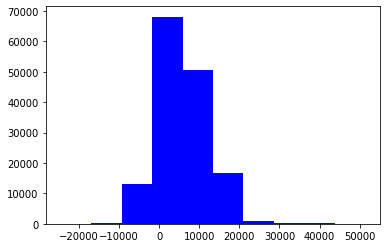

In [55]:
plt.hist(linear_predict, orientation = 'vertical',histtype = 'bar', color ='blue')
plt.show()

模型预测结果和真实结果分布相差径庭，而且预测结果出现负值！！
看来这种方式有问题啊！

power 和 price 散点图。。。。。


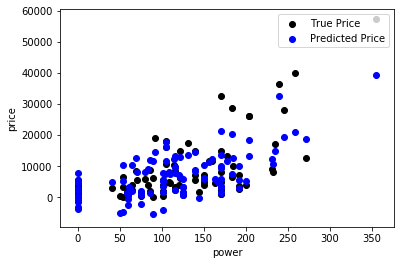

kilometer 和 price 散点图。。。。。


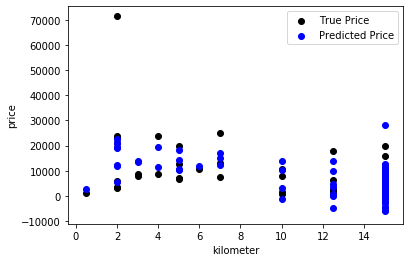

v_0 和 price 散点图。。。。。


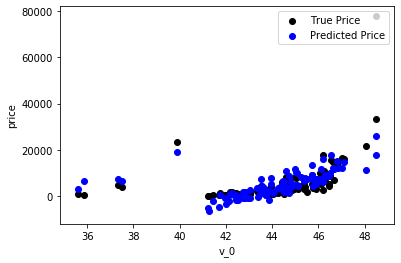

v_1 和 price 散点图。。。。。


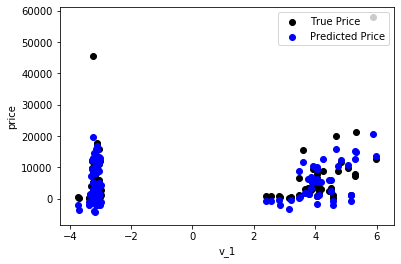

v_2 和 price 散点图。。。。。


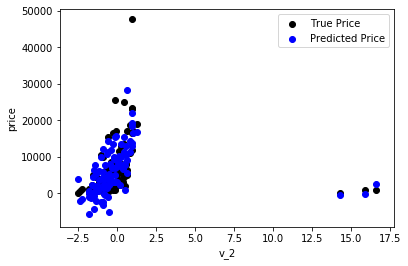

v_3 和 price 散点图。。。。。


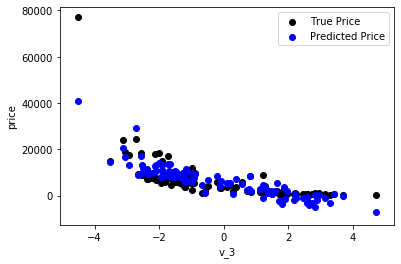

v_4 和 price 散点图。。。。。


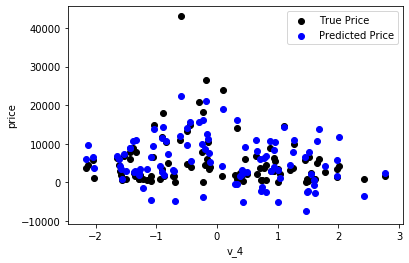

v_5 和 price 散点图。。。。。


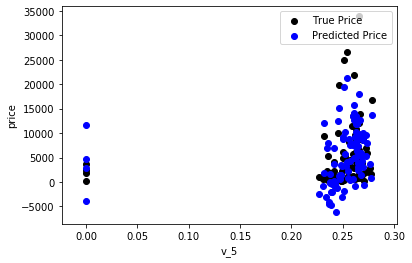

v_6 和 price 散点图。。。。。


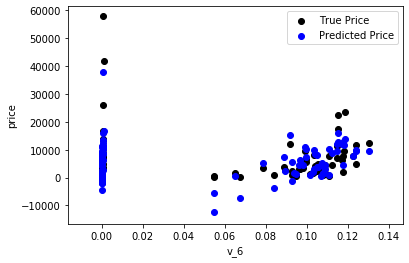

v_7 和 price 散点图。。。。。


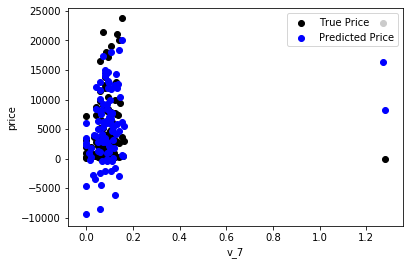

v_8 和 price 散点图。。。。。


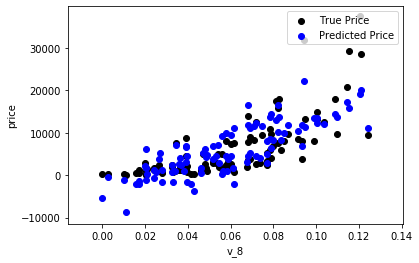

v_9 和 price 散点图。。。。。


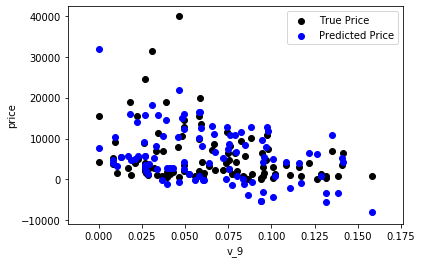

v_10 和 price 散点图。。。。。


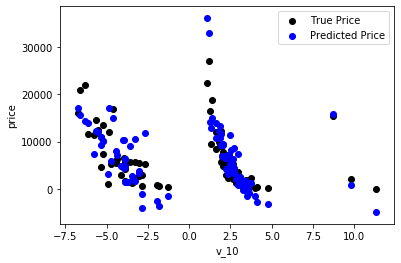

v_11 和 price 散点图。。。。。


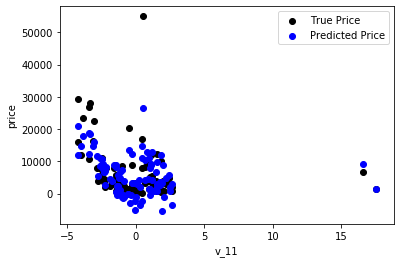

v_12 和 price 散点图。。。。。


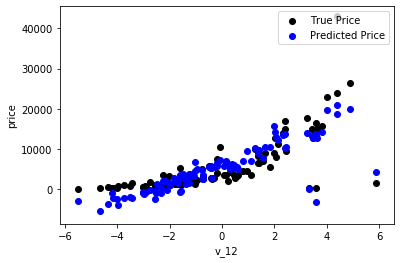

v_13 和 price 散点图。。。。。


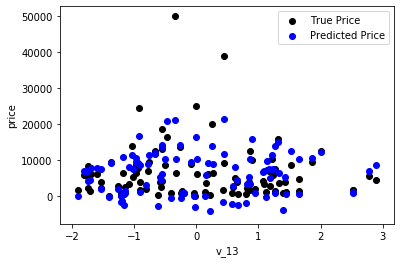

v_14 和 price 散点图。。。。。


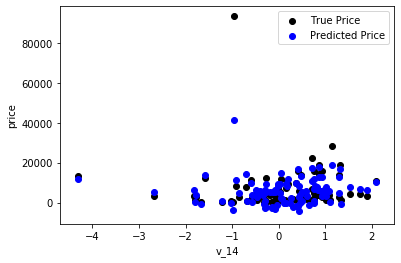

used_time 和 price 散点图。。。。。


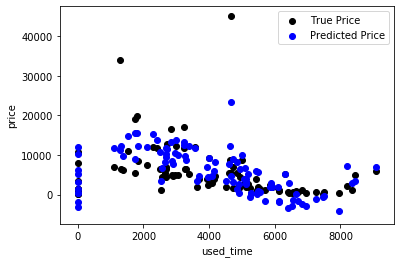

brand_amount 和 price 散点图。。。。。


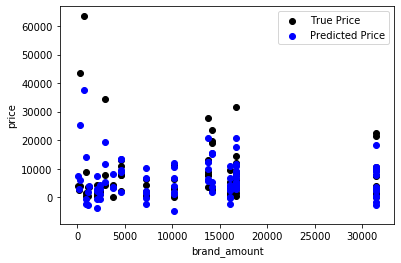

brand_price_max 和 price 散点图。。。。。


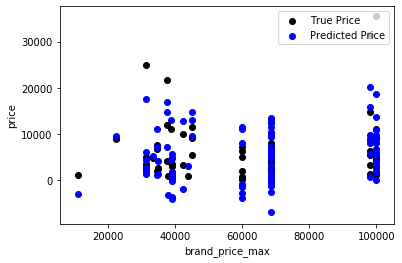

brand_price_median 和 price 散点图。。。。。


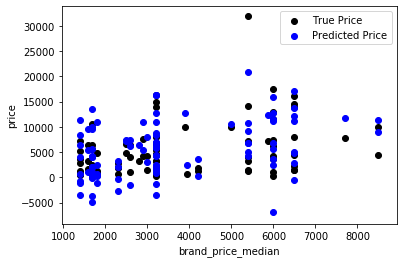

brand_price_min 和 price 散点图。。。。。


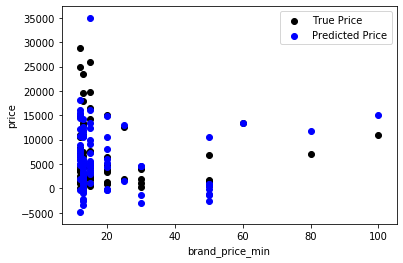

brand_price_sum 和 price 散点图。。。。。


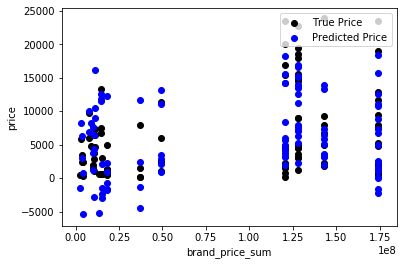

brand_price_std 和 price 散点图。。。。。


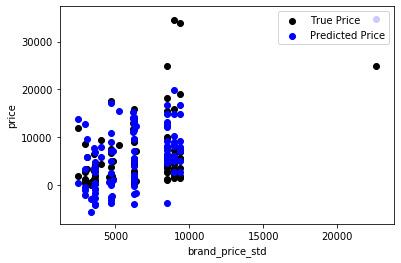

brand_price_average 和 price 散点图。。。。。


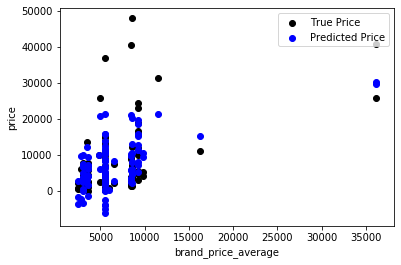

In [56]:
for col in continuous_feature_names:
    subsample_index = np.random.randint(low=0, high=len(train_y), size=100)
    print(f"{col} 和 price 散点图。。。。。")
    plt.scatter(train_X[col][subsample_index], train_y[subsample_index], color='black')
    plt.scatter(train_X[col][subsample_index], linear_predict[subsample_index], color='blue')
    plt.xlabel(col)
    plt.ylabel('price')
    plt.legend(['True Price','Predicted Price'],loc='upper right')
    plt.show()

从特征的值与标签的散点图，模型的预测结果和真实标签的的分布差异较大！